In [1]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
sys.path.append("..")

# importing all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nltk
from nltk.corpus import stopwords
# from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec

import time
from tqdm import tqdm

# ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# set Randomseed
RSEED = 42

# import needed functions
from modeling.processing import *

In [2]:
# load the first 100k lines of the review file into a dataframe

dfr = pd.read_csv('../data/yelp_dataset/review_1819.csv').iloc

In [3]:
# filter for only english reviews

dfr = language_processing(dfr, verbose=True)

In our Dataset we have a total of 1 different languages,
classified with an accuracy of at least 0.95.
------------------------------------------------------------------------------------------------------------------------------------------------------
These languages are (unsorted): 
{'Dutch', 'Portuguese', 'Italian', 'English', 'Swedish', 'German', 'Japanese', 'Chinese', 'Spanish', 'French'}
------------------------------------------------------------------------------------------------------------------------------------------------------
The classified languages represent 88.06 % of the dataset
------------------------------------------------------------------------------------------------------------------------------------------------------
The most occurring language is English, it occurred 87994 times
------------------------------------------------------------------------------------------------------------------------------------------------------
The algorithm was not able 

In [4]:
# initialize the stopword list:
stopwords = nltk.corpus.stopwords.words('english')

# update the stopwords after generating the first few clouds with non decisive words
#additional_stopwords = ['one', 'go', 'also', 'would', 'get', 'got']
#stopwords.extend(additional_stopwords)

In [5]:
# remove punctuation from the text in the initial df
dfr['text'] = dfr['text'].apply(remove_punctuation)

In [6]:
X = dfr['text']
y = dfr['stars']

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED)

In [7]:
# split data into feature and target 
import multiprocessing


sentences_train = [doc.split() for doc in X_train] # TODO here (and below): use NLTK tokenizers instead
# initialize word2vec (https://radimrehurek.com/gensim/models/word2vec.html)
# w2v = Word2Vec(sentences=sentences_train, vector_size=100, window=5, min_alpha=1, workers=4) # TODO SAVE!
# w2v = Word2Vec(sentences=sentences_train, vector_size=50, window=3, min_alpha=1, workers=8) # TODO SAVE!
w2v = Word2Vec(sentences=sentences_train, vector_size=200, window=3, min_alpha=1, workers=8) # TODO SAVE!

In [8]:
def get_sentences_embeddings_means(sentences):
    sentences_embeddings_means = []
    words_ignored = []
    for sent in sentences:
        sent_embeddings = []
        for token in sent:
            try:
                sent_embeddings.append(w2v.wv[token])
            except: # not possible for all words; ignored in w2c model because they are stop words!? (cf. ignored words listed below)
                words_ignored.append(token)
        sentences_embeddings_means.append(np.mean(sent_embeddings, axis=0))
    return sentences_embeddings_means, words_ignored

In [9]:
sentences_embeddings_means_train, words_ignored_train = get_sentences_embeddings_means(sentences_train)
X_train = sentences_embeddings_means_train

In [10]:
# print('Ignored words:')
# print(sorted(set(words_ignored_train))) # TODO check how long this takes

In [11]:
sentences_test = [doc.split() for doc in X_test]

In [12]:
sentences_embeddings_means_test, words_ignored_test = get_sentences_embeddings_means(sentences_test)
X_test = sentences_embeddings_means_test

In [13]:
# print('Ignored words:')
# print(sorted(set(words_ignored_test))) # TODO check how long this takes

In [14]:
# 
# # initialize the Classifier
# MNB = MultinomialNB()
# 
# # fit the model
# MNB.fit(X_train, y_train)
# 
# # make predictions
# y_pred = MNB.predict(X_test)
# 
# # test the model
# sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')
# 
# # show the classification report
# print(classification_report(y_pred, y_test))

In [15]:
# # initialize the Classifier
# LSVC = LinearSVC()
# 
# # fit the model
# LSVC.fit(X_train, y_train)
# 
# # make predictions
# y_pred = LSVC.predict(X_test)
# 
# # test the model
# sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')
# 
# # show the classification report
# print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.16      0.41      0.23      1297
         2.0       0.00      0.17      0.00        12
         3.0       0.04      0.27      0.07       282
         4.0       0.08      0.34      0.12       874
         5.0       0.93      0.53      0.67     19534

    accuracy                           0.51     21999
   macro avg       0.24      0.34      0.22     21999
weighted avg       0.84      0.51      0.62     21999



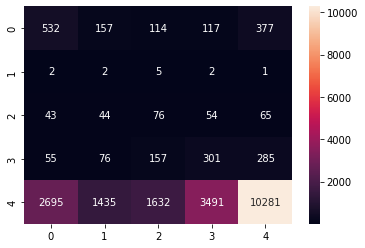

In [16]:
# initialize the Classifier
logreg = LogisticRegression()

# fit the model
logreg.fit(X_train, y_train)    

# make predictions
y_pred = logreg.predict(X_test)

# test the model
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='g')

# show the classification report
print(classification_report(y_pred, y_test))